In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *

# Uploading Dataset

In [2]:
data = pd.read_csv("churn modelling dataset.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Drop Un-essential Columns

In [3]:
data = data.drop(["RowNumber", "CustomerId", "Surname", "CreditScore"], axis = 1)
data.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Split the dataset into x and y

In [4]:
x = data.drop("Exited", axis = 1)

In [5]:
y = data.Exited

# Data Visualizetion

In [6]:
def plot(feature):
    ext_1 = data[data.Exited == 1][feature].value_counts()
    ext_0 = data[data.Exited == 0][feature].value_counts()
    
    df = pd.DataFrame([ext_1, ext_0])
    df.index = ["Exited", "Not_Exited"]
    df.plot(kind = "bar", stacked = True)

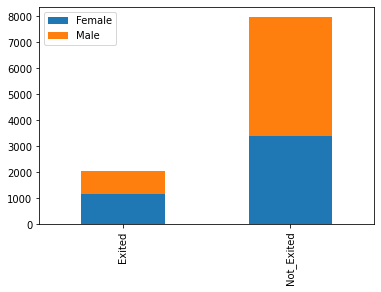

In [7]:
plot("Gender")

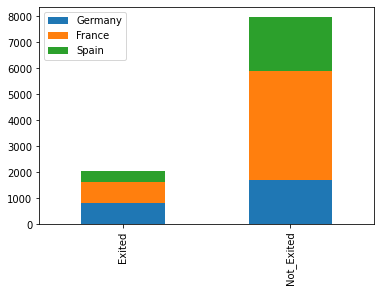

In [8]:
plot("Geography")

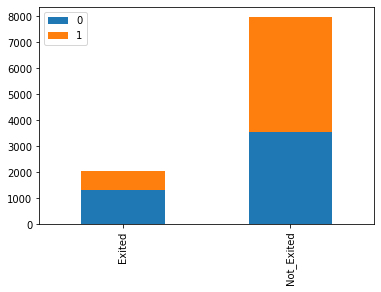

In [9]:
plot("IsActiveMember")

# Encoding and Sceling

In [10]:
categorical_col = ["Geography", "Gender"]
numerical_col = ["Age", "Tenure", "Balance", "EstimatedSalary"]

In [11]:
ct = ColumnTransformer(transformers=[("for_encoding", OneHotEncoder(handle_unknown= "ignore"), categorical_col), ("for_sceling", MinMaxScaler(), numerical_col)])

# Spliting the dataset into train and test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0)

# pipeline

In [13]:
pipe = make_pipeline(ct, DecisionTreeClassifier())

In [14]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('for_encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('for_sceling', MinMaxScaler(),
                                                  ['Age', 'Tenure', 'Balance',
                                                   'EstimatedSalary'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [15]:
y_pred = pipe.predict(x_test)

In [16]:
pipe.score(x_test, y_test)

0.7293333333333333

# Confution Matrix

## ROC Plot

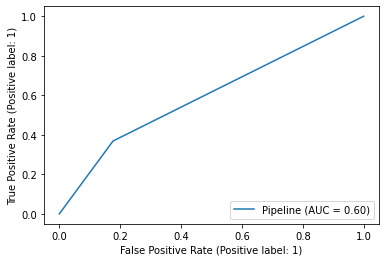

In [17]:
plot_roc_curve(pipe, x_test, y_test)

## Accuracy Score

In [18]:
score = accuracy_score(y_test, y_pred)

In [19]:
score

0.7293333333333333

## Confution Matrix

In [20]:
cmx = confusion_matrix(y_test, y_pred)

In [21]:
cmx

array([[1959,  420],
       [ 392,  229]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2379
           1       0.35      0.37      0.36       621

    accuracy                           0.73      3000
   macro avg       0.59      0.60      0.59      3000
weighted avg       0.73      0.73      0.73      3000



## Heat Map

Text(33.0, 0.5, 'Predicted')

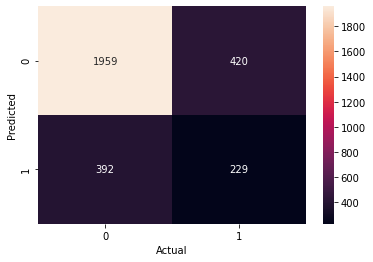

In [34]:
sns.heatmap(cmx, annot=True, fmt="d")
plt.xlabel('Actual')
plt.ylabel('Predicted')